In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

working_dir = os.getcwd()
data_dir = working_dir + '/Data/'
print(data_dir)

traindata = pd.read_csv(data_dir + 'TrainData.csv')
forecast_input = pd.read_csv(data_dir + "WeatherForecastInput.csv").filter(['WS10'])
solution = pd.read_csv(data_dir + "Solution.csv")

traindata = traindata.drop(['U100', 'V100', 'WS100'], axis=1)

X = traindata.filter(['WS10']).values
y = traindata.filter(['POWER']).values.ravel()

regressor = SVR()
regressor.fit(X, y)

prediction = regressor.predict(forecast_input)

mse = mean_squared_error(solution['POWER'],prediction)
rmse = np.sqrt(mse)

print("Training set score svr: {:.2f}".format(regressor.score(X, y)))
print("Prediction set score svr: {:.2f}".format(regressor.score(forecast_input, solution.filter(['POWER'], axis=1))))

solution = pd.read_csv(data_dir + "Solution.csv")
solved = solution.drop(['POWER'], axis=1)
solved["FORECAST"] = prediction
solved.to_csv(data_dir+"ForecastTemplate1-SVR.csv")

C:\Users\f-eiv\OneDrive\Dokumenter\GitHub\oblig2/Data/
Training set score svr: 0.55
Prediction set score svr: 0.47


<IPython.core.display.Javascript object>


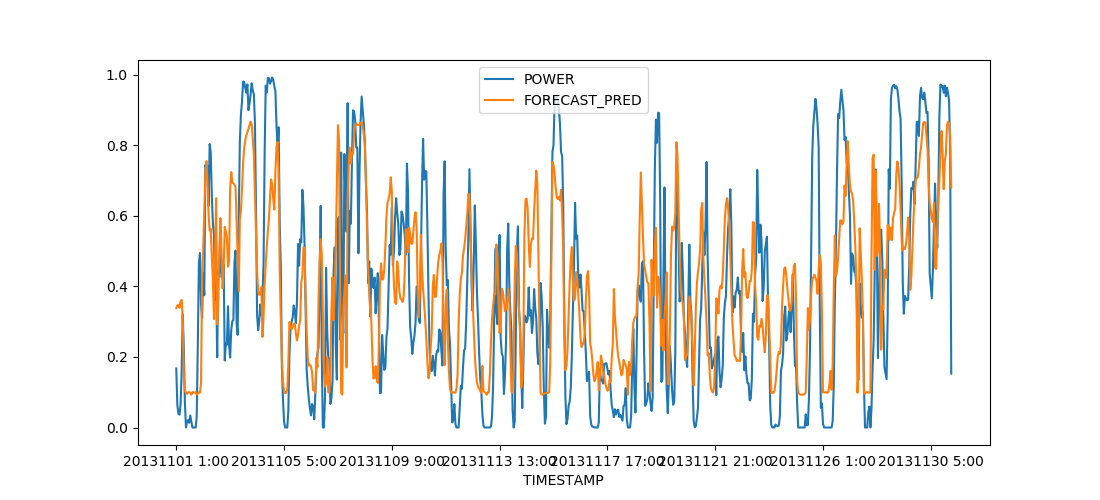

In [2]:
%matplotlib notebook

solution = solution.set_index('TIMESTAMP')
solvedPlotSVR = solution
solvedPlotSVR["FORECAST_PRED"] = prediction
solvedPlotSVR.plot(figsize=(11,5))